# 🚀 Unlocking the Power of Data: A Beginner's Journey with K-Means Clustering 📊

Welcome, fellow data enthusiasts, to an exciting voyage into the world of clustering analysis! In this beginner-friendly notebook, we embark on a quest to unravel the mysteries of K-Means clustering, one of the most widely used techniques in the realm of unsupervised learning. 🌟

Have you ever wondered how machines can autonomously group data points into meaningful clusters, without any prior labels? 🤔 Prepare to be amazed as we delve deep into the inner workings of K-Means, right from its foundational principles to a hands-on implementation from scratch. 🛠️

Whether you're a seasoned data scientist seeking to refresh your knowledge or a curious beginner eager to explore the realms of clustering, this journey is tailor-made for you. 🎓 No prior experience required – just an insatiable curiosity and a passion for unraveling the secrets hidden within data! 💡

***So, buckle up and join me as we decode the language of clusters, empowering ourselves to extract valuable insights and unlock the true potential of our data. Let's embark on this exhilarating adventure together! 💫***


### ***Import required dependencies***

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



../README.md
../IRIS.csv
../gold/k-means-simplified-expedition-into-clustering.ipynb


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from collections import Counter
%matplotlib inline

### ***EDA***

In [3]:
df = pd.read_csv('../IRIS.csv')
df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df['species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [5]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


### ***Data preprocessing***

In [7]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [8]:
df['species'].replace({'Iris-versicolor': 0}, inplace=True)
df['species'].replace({'Iris-setosa': 1}, inplace=True)
df['species'].replace({'Iris-virginica': 2}, inplace=True)

/var/folders/0z/9ctsbk397rqc2kl_dplkdsr00000gn/T/ipykernel_22675/1898927120.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'].replace({'Iris-virginica': 2}, inplace=True)


In [9]:
columns_to_drop = ['species', 'petal_length', 'petal_width']
X = df.drop(columns=columns_to_drop, inplace=False)
y = df['species']

print("X (Features):")
print(X.head())
print("\ny (Target):")
print(y.head())

X (Features):
   sepal_length  sepal_width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6

y (Target):
0    1
1    1
2    1
3    1
4    1
Name: species, dtype: int64


In [10]:
X.shape

(150, 2)

In [11]:
y.shape

(150,)

In [12]:
y.unique()

array([1, 0, 2])

### ***K-mean clustering***

In [13]:
def l1_distance(X_i, X_j):
    distance = 0
    for i in range(len(X_i)):
        distance += abs(X_i[i] - X_j[i])
    return distance

In [14]:
def l1_distance_numpy(X_i, X_j):
    return np.sum(np.abs(X_i - X_j))

In [15]:
def select_centroids_randomly(X, n, k):
    result = []
    for obj_id in np.random.randint(0, n, size=k):
        result.append(X[obj_id, :])
    return result

In [16]:
def evaluate_weight_progress(centroid_objects_prev, centroid_objects, k):
    """Calculate how the centers moved in one step of the algorithm"""
    result = []
    for i in range(k):
        dist = l1_distance_numpy(centroid_objects_prev[i],
                                 centroid_objects[i])
        result.append(dist)
    return result

In [17]:
def evaluate_cluster_labels(X, centroid_objects):
    """Calculate cluster labels."""
    # Calculate the number of data points and centroids
    n_samples = X.shape[0]
    n_centroids = centroid_objects.shape[0]
    
    # Initialize array to store distances
    distances = np.zeros((n_samples, n_centroids))
    
    # Calculate distances between each data point and each centroid using L1 distance
    for i in range(n_samples):
        for j in range(n_centroids):
            distances[i, j] = l1_distance_numpy(X[i], centroid_objects[j])
    
    # Find the index of the closest centroid for each data point
    cluster_labels = np.argmin(distances, axis=1)
    
    return cluster_labels

In [18]:
def evaluate_centroids(X, k, cluster_lables):
    """Calculate new centroids using the coordinate averaging method."""
    result = []
    for i in range(k):
        new_centroid = X[cluster_lables == i].mean(axis=0)
        result.append(new_centroid)
    return result

#### Value of the intragroup distance (Inertia)

To calculate inertia in the context of k-means clustering, we compute the total within-cluster sum of squares, which represents the sum of squared distances of samples to their closest cluster center. Mathematically, it can be expressed as:

$D_{\text{total}} = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2 $

Where:
- $(D_{\text{total}})$ is the total within-cluster sum of squares (inertia).
- $(k)$ is the number of clusters.
- $(C_i)$ is the \(i\)-th cluster.
- $(x)$ is a sample in cluster $(C_i)$.
- $(\mu_i)$ is the centroid of cluster $(C_i)$.

To calculate inertia, we need the following information:
1. The cluster labels assigned to each sample in the dataset.
2. The centroid coordinates of each cluster.

In [19]:
def calculate_inertia(X, centroids, cluster_labels):
    """Calculate inertia (total within-cluster sum of squares)."""
    inertia = 0
    for i, centroid in enumerate(centroids):
        cluster_points = X[cluster_labels == i]
        cluster_inertia = np.sum((cluster_points - centroid) ** 2)
        inertia += cluster_inertia
    return inertia

In [20]:
def plot_inertia(inertia_values):
    """Plot inertia values over iterations."""
    plt.plot(range(1, len(inertia_values) + 1), inertia_values, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Inertia (Total Within-Cluster Sum of Squares)')
    plt.title('Change in Inertia Over Iterations')
    plt.grid(True)
    plt.show()

In [21]:
def k_means(X: np.array, k: int = 2, eps: float = 0.001, num_iteration: int = 10) -> np.array:
    """K-means algorithm

    :param X: training data
    :param k: number of clusters
    """
    try:
        n, m = X.shape
    except ValueError:
        print("The training sample must be a two-dimensional array (n, m) where m is the sample size")
    # initialize the centroids with a random sample element
    centroid_objects = select_centroids_randomly(X, n, k)
    centroid_objects_prev = [np.zeros(m) for i in range(k)]
    # distance between the previous and current position of each centroid
    weight_evolution = evaluate_weight_progress(centroid_objects_prev, centroid_objects, k)
    step = 0
    # stop condition: the centroids have not changed their position
    # repeat until the stop condition is met
    inertia_values = []
    while sum(weight_evolution[i] > eps for i in range(k)) != 0 and step < num_iteration:
        centroid_objects_prev = centroid_objects.copy()
        # calculate cluster labels
        cluster_labels = evaluate_cluster_labels(X, np.array(centroid_objects))
        # average the coordinates of objects in each cluster - this is the new position of the centroid
        centroid_objects = evaluate_centroids(X, k, cluster_labels)
        # calculate the distance between centroids at adjacent iterations
        weight_evolution = evaluate_weight_progress(centroid_objects_prev, centroid_objects, k)
        print("шаг %s, смещение кластеров: %s" % (step, weight_evolution))
        inertia = calculate_inertia(X, centroid_objects, cluster_labels)
        inertia_values.append(inertia)
        # update clusters
        step += 1
    return np.vstack(centroid_objects), cluster_labels, inertia_values

In [30]:
centroids, cluster_labels,inertia_values = k_means(X.values, k=3)

cluster_df = pd.DataFrame(X.values, columns=['Feature_{}'.format(i+1) for i in range(X.shape[1])])
cluster_df['Cluster'] = cluster_labels

# 保存DataFrame为CSV文件
cluster_df.to_csv('cluster.csv', index=False)

шаг 0, смещение кластеров: [0.7012048192771081, 0.16857142857142815, 0.11562499999999787]
шаг 1, смещение кластеров: [0.22909821102592298, 0.14831168831168906, 0.06670258620689706]
шаг 2, смещение кластеров: [0.16076839826839828, 0.08377622377622274, 0.0]
шаг 3, смещение кластеров: [0.0, 0.02980148883374678, 0.06616379310344911]
шаг 4, смещение кластеров: [0.0, 0.05956423316355286, 0.08192567567567721]
шаг 5, смещение кластеров: [0.0, 0.0, 0.0]


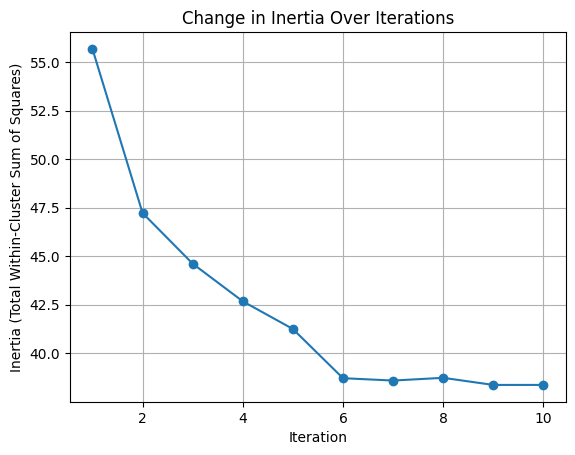

In [23]:
plot_inertia(inertia_values)

In [24]:
centroids

array([[5.        , 3.29107143],
       [5.96140351, 2.8       ],
       [6.93783784, 3.08648649]])

In [25]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1])

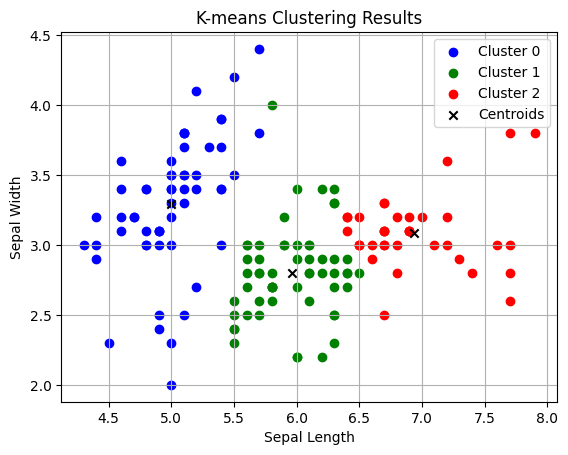

In [26]:
def plot_clusters(X, centroids, cluster_labels):
    """Plot data points with centroids and cluster labels."""
    # Define colors for each cluster
    colors = ['b', 'g', 'r']

    # Create a scatter plot for each cluster
    for cluster_id in range(len(centroids)):
        plt.scatter(X[cluster_labels == cluster_id, 0], X[cluster_labels == cluster_id, 1], color=colors[cluster_id], label=f'Cluster {cluster_id}')

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='black', label='Centroids')

    # Add labels and legend
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('K-means Clustering Results')
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.show()

plot_clusters(X.values, centroids, cluster_labels)

In [27]:
def assign_cluster_labels(cluster_labels, true_labels):
    """Assign class labels to clusters based on majority class."""
    cluster_to_class = {}
    for cluster_id in np.unique(cluster_labels):
        # Extract true labels corresponding to data points in the cluster
        cluster_true_labels = true_labels[cluster_labels == cluster_id]
        # Find the majority class in the cluster
        majority_class = Counter(cluster_true_labels).most_common(1)[0][0]
        cluster_to_class[cluster_id] = majority_class
    # Assign class labels to clusters
    assigned_labels = np.array([cluster_to_class[label] for label in cluster_labels])
    return assigned_labels

def calculate_accuracy(predicted_labels, true_labels):
    """Calculate accuracy of the classifier."""
    return np.mean(predicted_labels == true_labels)


# Assign class labels to clusters
predicted_labels = assign_cluster_labels(cluster_labels, y)

# Calculate accuracy
accuracy = calculate_accuracy(predicted_labels, y)
print(f"Accuracy of the prototype-based classifier: {accuracy}")

Accuracy of the prototype-based classifier: 0.7466666666666667


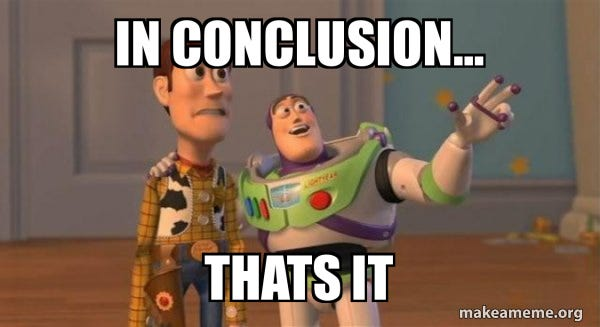